# Timing matmat_real functions

This code uses the magic function `%timeit`<sup> 1 2 </sup> to measure the excetution time of functions `matmat_real_dumb` , `matmat_real_numba`, `matmat_real_dot`, `matmat_real_columns` and `matmat_real_matvec`.

* <sup> 1 </sup>[Profiling and Timing Code - excerpt from the Python Data Science Handbook by Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/01.07-timing-and-profiling.html)

* <sup> 2 </sup>[Python documentation - timeit — Measure execution time of small code snippets](https://docs.python.org/3/library/timeit.html)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import functions as fcs
from tqdm.notebook import tqdm as tq # produce the progress bar

In [4]:
# number of elements forming the vectors
N = np.array([10, 50, 100, 200, 300])

In [5]:
list_time_dumb = []
list_time_numba = []
list_time_dot = []
list_time_columns = []
list_time_matvec = []
list_time_numpy = []
for Ni in tq(N):
    matrix = np.ones((Ni,Ni))
    # matmat_real_dumb
    time = %timeit -o fcs.matmat_real_dumb(matrix, matrix)
    list_time_dumb.append(time.average)
    # matmat_real_numba
    time = %timeit -o fcs.matmat_real_numba(matrix, matrix)
    list_time_numba.append(time.average)
    # matmat_real_dot
    time = %timeit -o fcs.matmat_real_dot(matrix, matrix)
    list_time_dot.append(time.average)
    # matmat_real_columns
    time = %timeit -o fcs.matmat_real_columns(matrix, matrix)
    list_time_columns.append(time.average)
    # matmat_real_matvec
    time = %timeit -o fcs.matmat_real_matvec(matrix, matrix)
    list_time_matvec.append(time.average)
    # numpy.dot
    time = %timeit -o np.dot(matrix, matrix)
    list_time_numpy.append(time.average)

1.02 ms ± 18.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.98 µs ± 6.53 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
165 µs ± 469 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
689 µs ± 4.96 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
30.5 µs ± 54.8 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
2.78 µs ± 32.8 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
122 ms ± 848 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
119 µs ± 168 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
4 ms ± 20 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
17.4 ms ± 157 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
266 µs ± 1.86 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
13.9 µs ± 19.5 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
943 ms ± 7.62 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
994 µs ± 7.14 µs per loop (mean ± std. dev. of 7 runs, 1000 loop

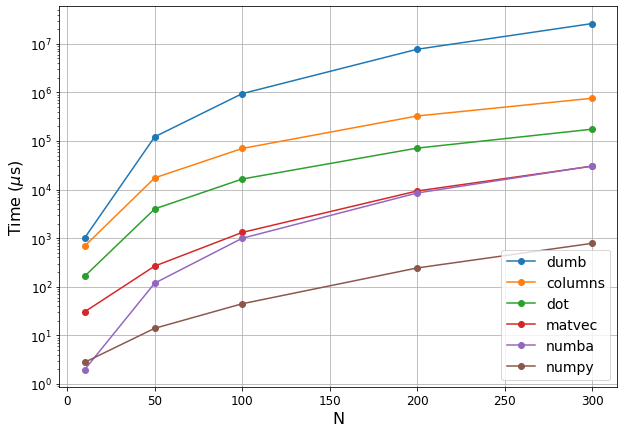

In [6]:
plt.figure(figsize=(10,7))
plt.plot(N, np.asarray(list_time_dumb)*1e6, 'o-', label = 'dumb')
plt.plot(N, np.asarray(list_time_columns)*1e6, 'o-', label = 'columns')
plt.plot(N, np.asarray(list_time_dot)*1e6, 'o-', label = 'dot')
plt.plot(N, np.asarray(list_time_matvec)*1e6, 'o-', label = 'matvec')
plt.plot(N, np.asarray(list_time_numba)*1e6, 'o-', label = 'numba')
plt.plot(N, np.asarray(list_time_numpy)*1e6, 'o-', label = 'numpy')
plt.legend(loc = 'best', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('N', fontsize = 16)
plt.ylabel('Time ($\mu$s)', fontsize = 16)
plt.yscale('log')
plt.grid()
plt.show()